<a href="https://colab.research.google.com/github/mdaugherity/MachineLearning2024/blob/main/tutorial/Tutorial_13_Digits_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dr. Daugherity, Abilene Christian University, PHYS 453**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Common utilities
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

# Classifiers
from sklearn.naive_bayes import GaussianNB

# Tutorial 13: The Digits Dataset
The digits dataset in sklearn is a sample of a [more complete dataset](http://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits).  Ours has 1,797 examples of classified hand-written digits 0-9 stored as pixel arrays with color from 0 (white) to 15 (black).



# Load Data

In [2]:
X,y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0) # stratify ensures an equal ratio of each target
print("Data:  ",X.shape,y.shape)
print("Train: ",X_train.shape, y_train.shape)
print("Test:  ",X_test.shape,y_test.shape)

Data:   (1797, 64) (1797,)
Train:  (1347, 64) (1347,)
Test:   (450, 64) (450,)


In [3]:
X_train[0]

array([ 0.,  0.,  0., 10., 12., 15., 16., 13.,  0.,  0.,  6., 15.,  6.,
        4., 14.,  9.,  0.,  0., 10.,  6.,  0.,  3., 14.,  2.,  0.,  1.,
       14.,  1.,  0., 12.,  6.,  0.,  0.,  0.,  3.,  0.,  5., 13.,  0.,
        0.,  0.,  0.,  0.,  1., 13.,  3.,  0.,  0.,  0.,  0.,  0.,  6.,
       13.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  6.,  0.,  0.,  0.])

Can you tell what number that is?

We have 64 features each representing a pixel color from 0 (white) to 15 (black).  These pixels meant to be shown in an 8x8 grid.  

Let's reshape and try again.


In [4]:
X_train[0].reshape(8,8)

array([[ 0.,  0.,  0., 10., 12., 15., 16., 13.],
       [ 0.,  0.,  6., 15.,  6.,  4., 14.,  9.],
       [ 0.,  0., 10.,  6.,  0.,  3., 14.,  2.],
       [ 0.,  1., 14.,  1.,  0., 12.,  6.,  0.],
       [ 0.,  0.,  3.,  0.,  5., 13.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 13.,  3.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 14.,  6.,  0.,  0.,  0.]])

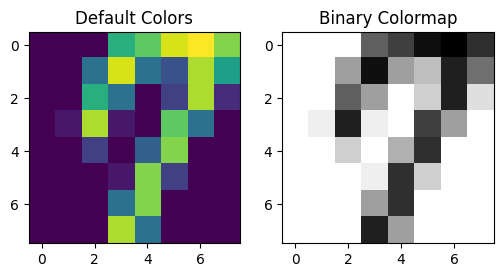

In [5]:
# Plot the first training sample
plt.figure(figsize=(6, 3))

plt.subplot(1,2,1)
plt.imshow(X_train[0].reshape(8,8))
plt.title("Default Colors")

plt.subplot(1,2,2)
plt.title("Binary Colormap")
plt.imshow(X_train[0].reshape(8,8), cmap=plt.cm.binary)

plt.show()

The `imshow` command draws the 8x8 image.  The default colors are quite pretty, but I'll stick with the black and white version

The targets are just the actual numbers that the humans were supposed to be drawing

In [6]:
y_train[0]

7

So that is supposed to be a 7


#VERY IMPORTANT WARNING
* To draw the images we need to make a 2D 8x8 array
* To use sklearn we need a 2D Nx64 array (for N samples)

We will use the reshape command to accomplish this feat:  
https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html  
In giving the new shape, you can use one -1 and numpy will calculate the dimension from the number of elements

In [7]:
X_train[0].shape

(64,)

So one sample is a 1D array with 64 elements, so we need to reshape it

In [8]:
X_train[0].reshape(8,8)  # make an 8x8 array for drawing

array([[ 0.,  0.,  0., 10., 12., 15., 16., 13.],
       [ 0.,  0.,  6., 15.,  6.,  4., 14.,  9.],
       [ 0.,  0., 10.,  6.,  0.,  3., 14.,  2.],
       [ 0.,  1., 14.,  1.,  0., 12.,  6.,  0.],
       [ 0.,  0.,  3.,  0.,  5., 13.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 13.,  3.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 14.,  6.,  0.,  0.,  0.]])

In [9]:
X_train[0].reshape(8,8).shape

(8, 8)

In [10]:
X_train[0].reshape(1,-1)  # make a 2D 1x64 array for sklearn  (-1 means to use all elements)

array([[ 0.,  0.,  0., 10., 12., 15., 16., 13.,  0.,  0.,  6., 15.,  6.,
         4., 14.,  9.,  0.,  0., 10.,  6.,  0.,  3., 14.,  2.,  0.,  1.,
        14.,  1.,  0., 12.,  6.,  0.,  0.,  0.,  3.,  0.,  5., 13.,  0.,
         0.,  0.,  0.,  0.,  1., 13.,  3.,  0.,  0.,  0.,  0.,  0.,  6.,
        13.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  6.,  0.,  0.,  0.]])

In [11]:
X_train[0].reshape(1,-1).shape

(1, 64)

**DO NOT PROCEED FURTHER** until you understand this.  

Now we can play with digits

# Drawing Digits

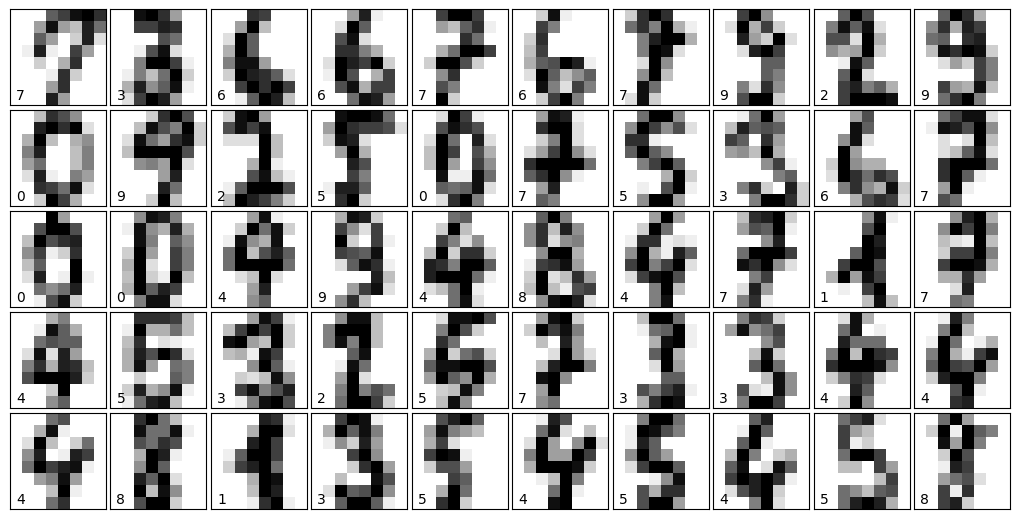

In [12]:
# Plot the first 50 samples
fig = plt.figure(figsize=(10, 5))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) # make small panels

for i in range(50):
    ax = fig.add_subplot(5,10, i + 1, xticks=[], yticks=[])
    ax.imshow(X_train[i].reshape(8,8), cmap=plt.cm.binary)
    ax.text(0, 7, str(y_train[i]))  # label the image with the target value

plt.show()

In [13]:
y_train[:50] # the true numbers in the training set

array([7, 3, 6, 6, 7, 6, 7, 9, 2, 9, 0, 9, 2, 5, 0, 7, 5, 3, 6, 7, 0, 0,
       4, 9, 4, 8, 4, 7, 1, 7, 4, 5, 3, 2, 5, 7, 3, 3, 4, 4, 4, 8, 1, 3,
       5, 4, 5, 4, 5, 8])

In [14]:
target,count = np.unique(y_train, return_counts=1)
print("Target\tCount")
for t,c in zip(target,count):
    print(t,'\t',c)

Target	Count
0 	 133
1 	 136
2 	 133
3 	 137
4 	 136
5 	 136
6 	 136
7 	 134
8 	 131
9 	 135


We have nearly equal numbers of all the digits in the training set.  Adding the `stratify` option in the test/train split helps ensure this.

Let's try training a classifier and seeing if it works

# Classifier Performance
## The Training Data

In [15]:
clf = GaussianNB()  # No parameters to pick!
clf.fit(X_train,y_train)  # only train on the training data!!!!!!!!!!!
clf.score(X_train,y_train)

0.8478099480326652

The gaussian fits get 85% of the training data right.  Where did it go wrong?

### The Test Data
The only fair way to evaluate a classifier is to use data **it hasn't been trained on**.  That's why we reserved 100 samples for a testing data set.  How well do we do with new samples the classifiers hasn't seen before?

In [16]:
clf.score(X_test,y_test)

0.8355555555555556

We get 84% right!  Consistent scores between the test and train dataset are a good sign that we are not under or over fitting.

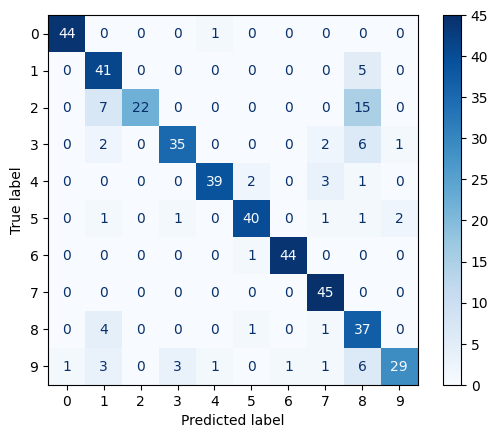

In [17]:
y_pred = clf.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,cmap='Blues')
plt.show()

We get a nice visualization of our mistakes. We often confuse 2's as 8's. So if I were going to try to improve performance then those are the places I would start.

In [18]:
# Find the miss-classified samples
miss = []  # save missed sample numbers
print('Sample\tTruth\tPredicted')
for i,pred in enumerate(y_pred):
    if pred!=y_test[i]:
        print(f"{i}\t{y_test[i]}\t{pred}")
        miss.append(i)

Sample	Truth	Predicted
0	2	1
3	9	6
6	2	8
12	8	1
14	9	3
24	2	8
26	5	1
28	2	1
32	9	3
38	4	8
40	2	8
46	5	7
47	9	8
54	4	7
57	2	8
58	5	8
64	2	8
65	2	1
66	9	1
70	3	9
85	8	7
96	9	7
111	5	9
117	9	8
120	1	8
123	2	8
170	4	5
172	1	8
175	2	1
177	2	8
181	3	8
203	3	8
206	3	8
208	2	8
209	8	5
217	8	1
225	4	5
245	0	4
249	5	9
254	8	1
256	2	8
261	9	8
265	3	7
268	2	1
271	9	8
275	1	8
276	2	1
282	4	7
284	2	8
299	3	7
302	3	8
309	6	5
319	2	8
321	2	8
329	3	8
336	4	7
353	9	8
354	9	8
359	9	1
366	3	1
372	8	1
383	9	3
386	9	0
390	5	3
406	2	8
413	2	8
419	2	1
433	3	1
439	9	1
441	2	8
443	3	8
444	1	8
448	1	8
449	9	4


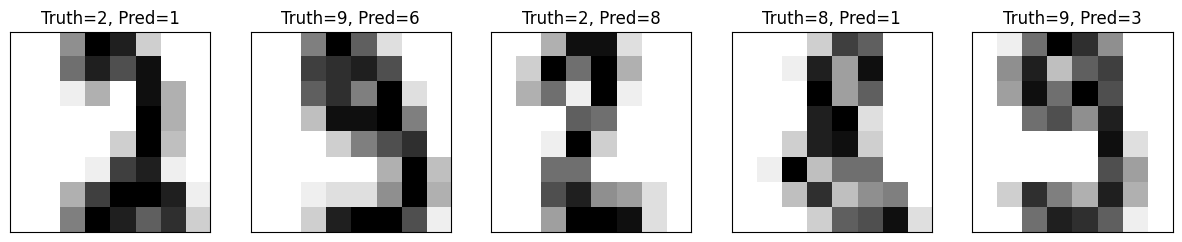

In [19]:
# Plot the first 5 missed samples
fig = plt.figure(figsize=(15, 3))
#fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) # make small panels

for i in range(5):
    m = miss[i]  # the sample number we are looking at
    ax = fig.add_subplot(1,5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[m].reshape(8,8), cmap=plt.cm.binary)
    plt.title(f"Truth={y_test[m]}, Pred={y_pred[m]}")

plt.show()

Some of these are reasonable guesses, but some are pretty strange.

In Homework 4 you will try to do better!